In [5]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM, VQC
from qiskit.aqua.components import variational_forms
from qiskit.aqua.components.optimizers import COBYLA, SPSA

from embed_utils import MyVQC
from var_utils import MyRYRZ

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/hpc/anaconda3/envs/tf-quantum/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hpc/anaconda3/envs/tf-quantum/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [33]:
import itertools
num_bits = 6

x_train = []
y_train = []

for comb in itertools.product('01', repeat=num_bits):
    comb = [int(x) for x in comb]
    x_train.append(comb)
    y_train.append(sum(comb) % 2)
#     y_train.append(int(comb[0]))
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [34]:
num_qubit = num_bits // 3
x_st = []
for x in x_train:
    x_st.append(''.join(x.astype(str)))
    
x_st = np.array(x_st)

In [35]:
x_st

array(['000000', '000001', '000010', '000011', '000100', '000101',
       '000110', '000111', '001000', '001001', '001010', '001011',
       '001100', '001101', '001110', '001111', '010000', '010001',
       '010010', '010011', '010100', '010101', '010110', '010111',
       '011000', '011001', '011010', '011011', '011100', '011101',
       '011110', '011111', '100000', '100001', '100010', '100011',
       '100100', '100101', '100110', '100111', '101000', '101001',
       '101010', '101011', '101100', '101101', '101110', '101111',
       '110000', '110001', '110010', '110011', '110100', '110101',
       '110110', '110111', '111000', '111001', '111010', '111011',
       '111100', '111101', '111110', '111111'], dtype='<U6')

In [36]:
from qiskit import QuantumCircuit

In [37]:
training_input

{0: array(['000', '011', '101', '110'], dtype='<U3'),
 1: array(['001', '010', '100', '111'], dtype='<U3')}

In [38]:
num_qubit

2

In [43]:
from quantum_utils import CustomFeatureMap
from qiskit.aqua.components import variational_forms
from qiskit.aqua.components.optimizers import COBYLA, SPSA
from qiskit.providers.aer import QasmSimulator
from qiskit.aqua import QuantumInstance

import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

seed = 10598

vqc_ordinal_log = []
def loss_history_callback(_, __, loss, ___):
    vqc_ordinal_log.append(loss)

feature_map = QuantumCircuit(num_qubit) # Empty Circuit
var_form = MyRYRZ(num_qubit, depth=4)

training_input = {
    0: x_st[y_train == 0],
    1: x_st[y_train == 1]
}

qsvm = MyVQC(SPSA(100), feature_map, var_form, training_input, callback=loss_history_callback)

backend_options = {"method": "statevector_gpu"}
backend = QasmSimulator(backend_options)

quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed,optimization_level=3)


result = qsvm.run(quantum_instance)

y_pred_train = qsvm.predict(x_st)[1]


# F1 score
acc_f1_train = (np.mean(y_pred_train == y_train), f1_score(y_train, y_pred_train))


# qsvm.save_model(f'models/titanic_QRAC_mapped_no13_implementation_fold_{ro}')


/home/hpc/anaconda3/envs/tf-quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The qiskit.aqua.components.variational_forms.RYRZ object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.EfficientSU2 (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.
/home/hpc/anaconda3/envs/tf-quantum/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
/home/hpc/Desktop/Napat_work/qc_group_project/embed_utils.py:545: UserWarning: The feature map has no parameters that can be optimized to represent the 

2020-08-23 18:25:25,637:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:26,673:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:27,506:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:28,465:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:28,636:qiskit.aqua.components.optimizers.spsa:DEBUG: calibration step # 15 of 20
2020-08-23 18:25:29,276:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:30,375:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:31,154:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:32,104:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the N

2020-08-23 18:26:04,883:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 13: 0.9569403
2020-08-23 18:26:04,884:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 13: 1.0882093
2020-08-23 18:26:05,539:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:06,599:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:06,866:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 14: 0.8071557
2020-08-23 18:26:06,867:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 14: 0.8612126
2020-08-23 18:26:07,584:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:08,657:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:08,925:qiskit.aqua.componen

2020-08-23 18:26:37,763:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 30: 0.6706762
2020-08-23 18:26:38,463:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:39,686:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:39,860:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 31: 0.6548950
2020-08-23 18:26:39,860:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 31: 0.6779831
2020-08-23 18:26:40,496:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:41,518:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:41,718:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 32: 0.6504966
2020-08-23 18:26:41,719:qiskit.aqua.componen

2020-08-23 18:27:11,334:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:12,382:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:12,575:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 48: 0.6547902
2020-08-23 18:27:12,576:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 48: 0.6202457
2020-08-23 18:27:13,216:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:14,419:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:14,613:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 49: 0.6230222
2020-08-23 18:27:14,613:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 49: 0.6208563
2020-08-23 18:27:15,244:qiskit.aqua.utils.ru

2020-08-23 18:27:45,134:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:45,308:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 65: 0.6128035
2020-08-23 18:27:45,309:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 65: 0.5849000
2020-08-23 18:27:45,930:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:46,922:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:47,121:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 66: 0.5812914
2020-08-23 18:27:47,121:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 66: 0.5992580
2020-08-23 18:27:47,789:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:49,006:qiskit.aqua.utils.ru

2020-08-23 18:28:17,726:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 82: 0.5281252
2020-08-23 18:28:17,727:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 82: 0.5535266
2020-08-23 18:28:18,537:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:28:19,476:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:28:19,661:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 83: 0.5362669
2020-08-23 18:28:19,662:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 83: 0.5463544
2020-08-23 18:28:20,348:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:28:21,405:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:28:21,588:qiskit.aqua.componen

2020-08-23 18:28:50,575:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 99: 0.5203819
2020-08-23 18:28:51,462:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:28:51,643:qiskit.aqua.components.optimizers.spsa:DEBUG: Final objective function is: 0.5136153
2020-08-23 18:28:52,340:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.


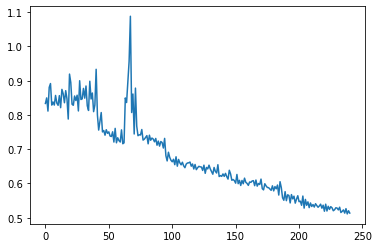

In [46]:
plt.plot(vqc_ordinal_log)

In [30]:
qsvm.construct_circuit('110', np.array([2 for i in range(18)])).draw()

┌─────────────┐┌───────────┐┌───────────┐┌───────┐ ░  ░  ░  ░  ░  ░  ░  ░ »
q_0: ┤ circuit1023 ├┤ U3(2,2,0) ├┤ U3(2,0,0) ├┤ U1(2) ├─░──░──░──░──░──░──░──░─»
     └─────────────┘└───────────┘└───────────┘└───────┘ ░  ░  ░  ░  ░  ░  ░  ░ »
c_0: ══════════════════════════════════════════════════════════════════════════»
                                                                               »
«      ░ 
«q_0: ─░─
«      ░ 
«c_0: ═══
«

In [44]:
result

{'num_optimizer_evals': None,
 'min_val': 0.5136153235858316,
 'opt_params': array([-0.93708844, -3.05307024, -3.39536786, -6.20729495,  2.72791213,
         4.17536549, -2.26133191,  2.65852434,  1.99452056, -0.17574343,
         2.57636654, -2.43616345, -2.12489909,  0.00742505,  3.21982382,
        -1.60457892, -2.22016763, -3.51689789, -1.38351227,  3.15870132,
        -4.58867349,  0.06818234,  0.14570487,  4.13592778,  0.67214873,
        -3.97314604, -1.3567407 ,  0.13678001, -1.27824855,  2.60078556,
        -2.29449291, -0.77599605,  2.166544  ,  3.32912227,  2.59597286,
         1.05770581, -5.05728945,  0.9846406 ,  2.30504427,  0.67550717,
         0.22682823,  1.8679817 , -0.03941176, -4.0589281 ,  1.50312933,
        -2.78951348,  2.1863096 , -4.26811761, -0.17916239, -1.5931047 ,
         1.94774883,  2.13782603]),
 'eval_time': 231.22380137443542,
 'eval_count': 241,
 'training_loss': 0.5136153235858316,
 'predicted_probs': array([[0.63085938, 0.36914062],
        [0.17

In [45]:
np.mean(y_train == result['predicted_labels'])

0.828125